In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import glob
files = glob.glob("./状態感知実験/*.csv")
print(len(files))

5


./状態感知実験/有人.csv


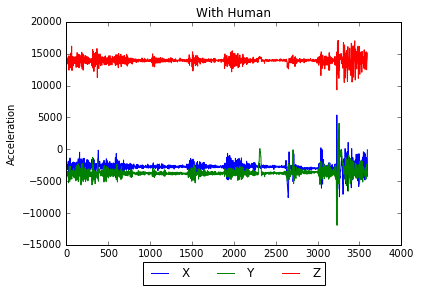

./状態感知実験/有人2.csv


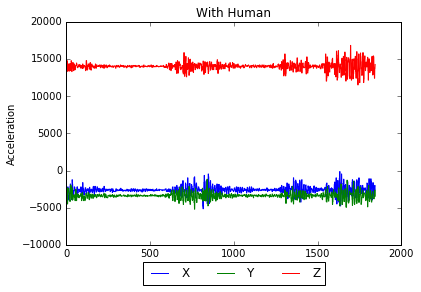

./状態感知実験/溺れ.csv


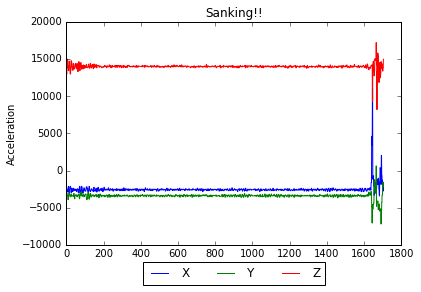

./状態感知実験/無人.csv


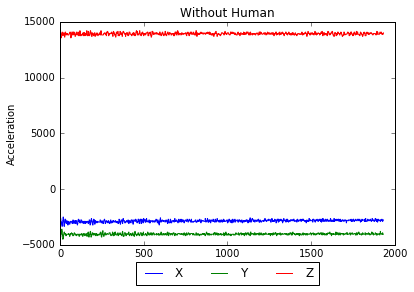

./状態感知実験/無人2.csv


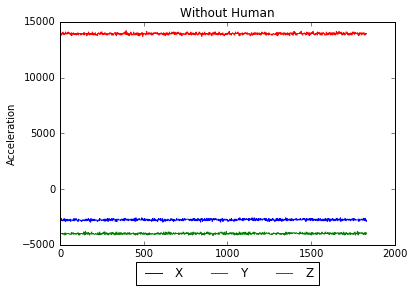

In [8]:
for file in files:
    print(file)
    data = pd.read_csv(file)
    X = []
    Y = []
    Z = []
    for row in data.iterrows():
        X.append(row[1][0])
        Y.append(row[1][1])
        Z.append(row[1][2])
    flag = file.split("/")[-1]
    if flag[:2] == "有人":
        title = "With Human"
    elif flag[:2] == "無人":
        title = "Without Human"
    else:
        title = "Sanking!!"
    plt.title(title)
    plt.xlabel("Time [ms]")
    plt.ylabel("Acceleration")
    plt.plot(X, label="X")
    plt.plot(Y, label="Y")
    plt.plot(Z, label="Z")
    plt.legend(loc="upper center", bbox_to_anchor=(0.5,-0.05), ncol=3)
    plt.savefig("./images/{0}.png".format(title))
    plt.show()

In [16]:
def calc_mean_XYZ(data):
    for row in data.iterrows():
        X.append(row[1][0])
        Y.append(row[1][1])
        Z.append(row[1][2])
    return np.mean(X), np.mean(Y), np.mean(Z)

# no human
no_human_data = pd.read_csv(files[-1])
base_X, base_Y, base_Z = calc_mean_XYZ(no_human_data)
print("base_X", base_X)
print("base_Y", base_Y)
print("base_Z", base_Z)

def calc_double_square_error(data):
    X = []
    Y = []
    Z = []
    for row in data.iterrows():
        X.append(row[1][0] - base_X)
        Y.append(row[1][1] - base_Y)
        Z.append(row[1][2] - base_Z)
    print("RMS(X): ", np.mean([x*x for x in X]))
    print("RMS(Y): ", np.mean([x*x for x in Y]))
    print("RMS(Z): ", np.mean([x*x for x in Z]))

base_X -2737.45931185
base_Y -3970.06226106
base_Z 13934.80284


In [14]:
human_data = pd.read_csv(files[0])
sanking_data = pd.read_csv(files[3])
print("HUMAN")
calc_double_square_error(human_data)
print("SANKING")
calc_double_square_error(sanking_data)

HUMAN
RMS(X):  691969.880756
RMS(Y):  718450.877299
RMS(Z):  393761.155488
SANKING
RMS(X):  22886.2094262
RMS(Y):  9375.93832491
RMS(Z):  10639.7896322
